In [1]:
import pandas as pd
import numpy as np
train_r

In [92]:
train_region = "SanDiego"
test_region = "Austin"
appliance = "hvac"
feature = "Monthly"
strategy_list = ["None","CDD","median-aggregate"][:]
import glob

In [108]:
out = {}
for train_region in ["SanDiego"]:
    for strategy in strategy_list:
        try:
            directory = '../data/output/cross/%s_%s_%s_%s_%s/' % (train_region, 
                                                                    test_region,
                                                                     strategy,
                                                                    appliance,

                                                                   feature)
            home_files = glob.glob(directory+"*.csv")
            out[strategy] = {}
            homes = []
            for home_file in home_files:
                home = int(home_file.split("/")[-1][:-4])
                homes.append(home)
                df = pd.read_csv(home_file, index_col=0, header=None).squeeze()
                df.index.name = "Month"
                out[strategy][home]=df
        except:
            pass

In [109]:
acc={strategy:pd.DataFrame(out[strategy]).mean(axis=1) for strategy in strategy_list}




In [110]:
%matplotlib inline

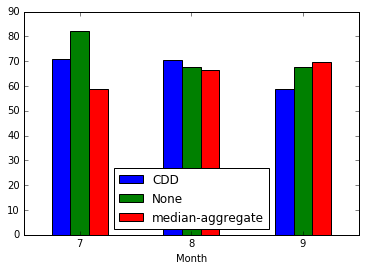

In [111]:
pd.DataFrame(acc).plot(kind="bar",rot=0)

In [97]:
acc

{'CDD': Month
 7    71.054210
 8    70.592257
 9    58.666374
 dtype: float64, 'None': Month
 7    82.005931
 8    67.586248
 9    67.772089
 dtype: float64, 'median-aggregate': Month
 7    58.593951
 8    66.618140
 9    69.847450
 dtype: float64}

In [102]:
directory

'../data/output/cross/Austin_Austin_median-aggregate_hvac_Monthly/'

In [103]:
out

{'CDD': {}, 'None': {26: Month
  7    74.822046
  8    76.152687
  9    75.905163
  Name: 1, dtype: float64, 59: Month
  7    12.833763
  8    67.929869
  9    38.081134
  Name: 1, dtype: float64, 94: Month
  7    0.228539
  8    7.310815
  9    0.000000
  Name: 1, dtype: float64, 135: Month
  7    78.377452
  8    82.711176
  9    84.962831
  Name: 1, dtype: float64, 222: Month
  7    82.983607
  8    95.566267
  9    93.279658
  Name: 1, dtype: float64, 370: Month
  7    83.781438
  8    86.185420
  9    98.379818
  Name: 1, dtype: float64, 410: Month
  7    97.251491
  8    90.857532
  9    99.561482
  Name: 1, dtype: float64, 545: Month
  7    80.114388
  8    94.033583
  9    74.376470
  Name: 1, dtype: float64, 624: Month
  7    94.109148
  8    74.337688
  9    65.064377
  Name: 1, dtype: float64, 661: Month
  7    88.225507
  8    94.544013
  9    97.059678
  Name: 1, dtype: float64, 871: Month
  7    64.403418
  8    72.127189
  9    52.214919
  Name: 1, dtype: float64, 936: M

In [107]:
pd.DataFrame(out["None"]).T.describe()

Month,7,8,9
count,75.000000,75.000000,75.000000
mean,71.776474,72.043512,71.672302
std,26.389427,25.097198,24.315080
min,0.000000,0.000000,0.000000
25%,67.697537,68.169101,62.386509
50%,80.580559,79.691417,77.879811
75%,87.467709,89.803283,88.318212
max,99.484391,97.582407,99.810983
